# PROJET IBRAHIM Sébastien : Housing Prices Competition

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
sns.set(font_scale=1)

On importe les données sur lesquelles on va entraîner notre modèle ainsi que les données sur lesquelles on souhaite tester notre modèle.

In [191]:
train=pd.read_csv('/home/ibrahim/Téléchargements/train.csv') # Importation des données pour entrainer le modèle.
test=pd.read_csv('/home/ibrahim/Téléchargements/test.csv') # Importation des données que l'on souhaite tester.
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [192]:
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Pour cette base de données, en moyenne, le prix de vente d'un bien immobilier est de 180921.19 dollars, 75 pourcent des biens immobiliers se sont vendus 214 000 $ ou moins et le bien le plus chères, c'est vendus à 755 000 dollars.

## I ) Visualisation des données

On affiche sur un graphique le prix d'un bien en fonction de la surface habitable.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

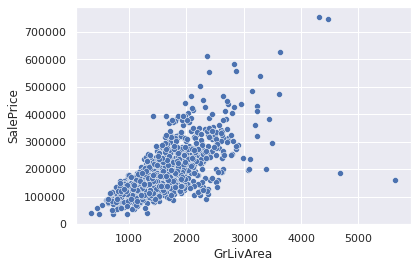

In [193]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train) 

### a ) Valeurs aberrantes

On remarque qu'il y a des valeurs aberrantes qui peuvent avoir des répercussions sur le modèle. On localise les biens dont la surface habitable est supérieure à 4 000 puis on retire ces valeurs de la base de données.

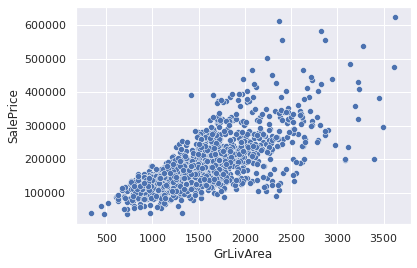

In [194]:
train = train.drop(train.loc[(train['GrLivArea']>4000)].index,0)

train.reset_index(drop=True, inplace=True) # Réinitialisation des indices de la base de données.

sns.scatterplot(x='GrLivArea',y='SalePrice',data=train);

### b ) Corrélation des variables

On veut savoir avec quelles variables le prix de vente est le plus dépendant.

Pour cela, on supprime de la base de données la variable 'Id', on calcule la corrélation entre les variables et on trie par ordre décroissant les variables qui impactent le plus le prix de vente.

In [195]:
corr = train.drop('Id',1).corr().sort_values(by='SalePrice',ascending=False).round(3) 
print(corr['SalePrice'])

SalePrice        1.000
OverallQual      0.801
GrLivArea        0.721
GarageCars       0.649
TotalBsmtSF      0.647
GarageArea       0.637
1stFlrSF         0.625
FullBath         0.559
TotRmsAbvGrd     0.537
YearBuilt        0.535
YearRemodAdd     0.521
GarageYrBlt      0.499
MasVnrArea       0.479
Fireplaces       0.467
BsmtFinSF1       0.396
LotFrontage      0.357
OpenPorchSF      0.330
WoodDeckSF       0.323
2ndFlrSF         0.297
HalfBath         0.283
LotArea          0.270
BsmtFullBath     0.236
BsmtUnfSF        0.221
BedroomAbvGr     0.161
ScreenPorch      0.118
MoSold           0.057
3SsnPorch        0.047
PoolArea         0.033
BsmtFinSF2      -0.009
MiscVal         -0.021
YrSold          -0.024
LowQualFinSF    -0.025
BsmtHalfBath    -0.037
OverallCond     -0.080
MSSubClass      -0.088
EnclosedPorch   -0.130
KitchenAbvGr    -0.139
Name: SalePrice, dtype: float64


On observe que le prix de vente est fortement corrélé avec les variables : OverallQual, GrLivArea, TotalBsmtSF, GarageCars, 1stFlrSF, GarageArea.

On affiche la heatmap.

<Figure size 1440x1440 with 0 Axes>

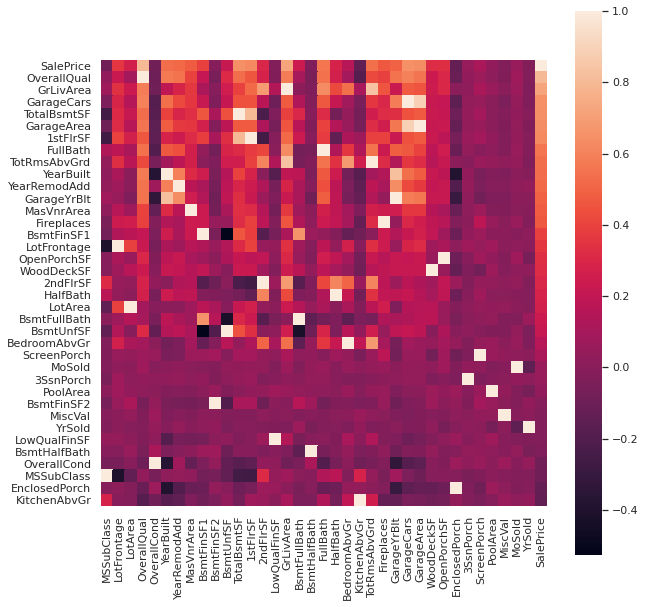

In [196]:
plt.figure(figsize=(20, 20))
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True);

Cette fois, on affiche la heatmap et la matrice de corrélation des 10 variables les plus corrélées avec le prix de vente.

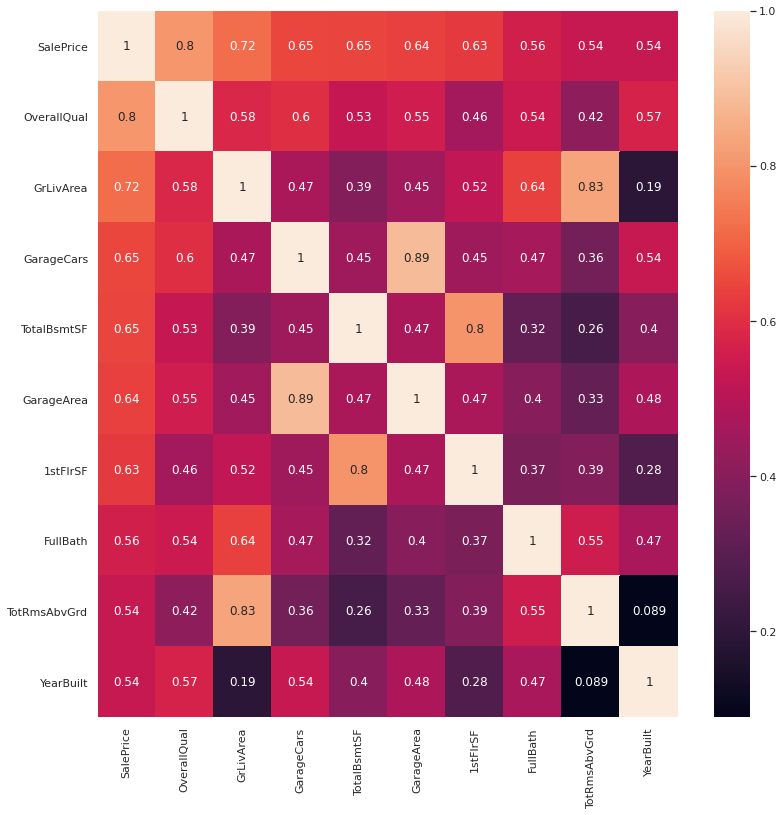

In [197]:
plt.figure(figsize=(13, 13))
cols =corr['SalePrice'].head(10).index # On sélectionne les 10 variables les plus corrélées avec la variable 'SalePrice'.
cm = np.corrcoef(train[cols].values.T) # Matrice de corrélation.
sns.set(font_scale=1) # Taille des caractères.
hm = sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values) 
plt.show() # Affichage de la heatmap et de la matrice de corrélation.

On visualise la corrélation entre les variables à l'aide de pairplot.

<Figure size 1080x1080 with 0 Axes>

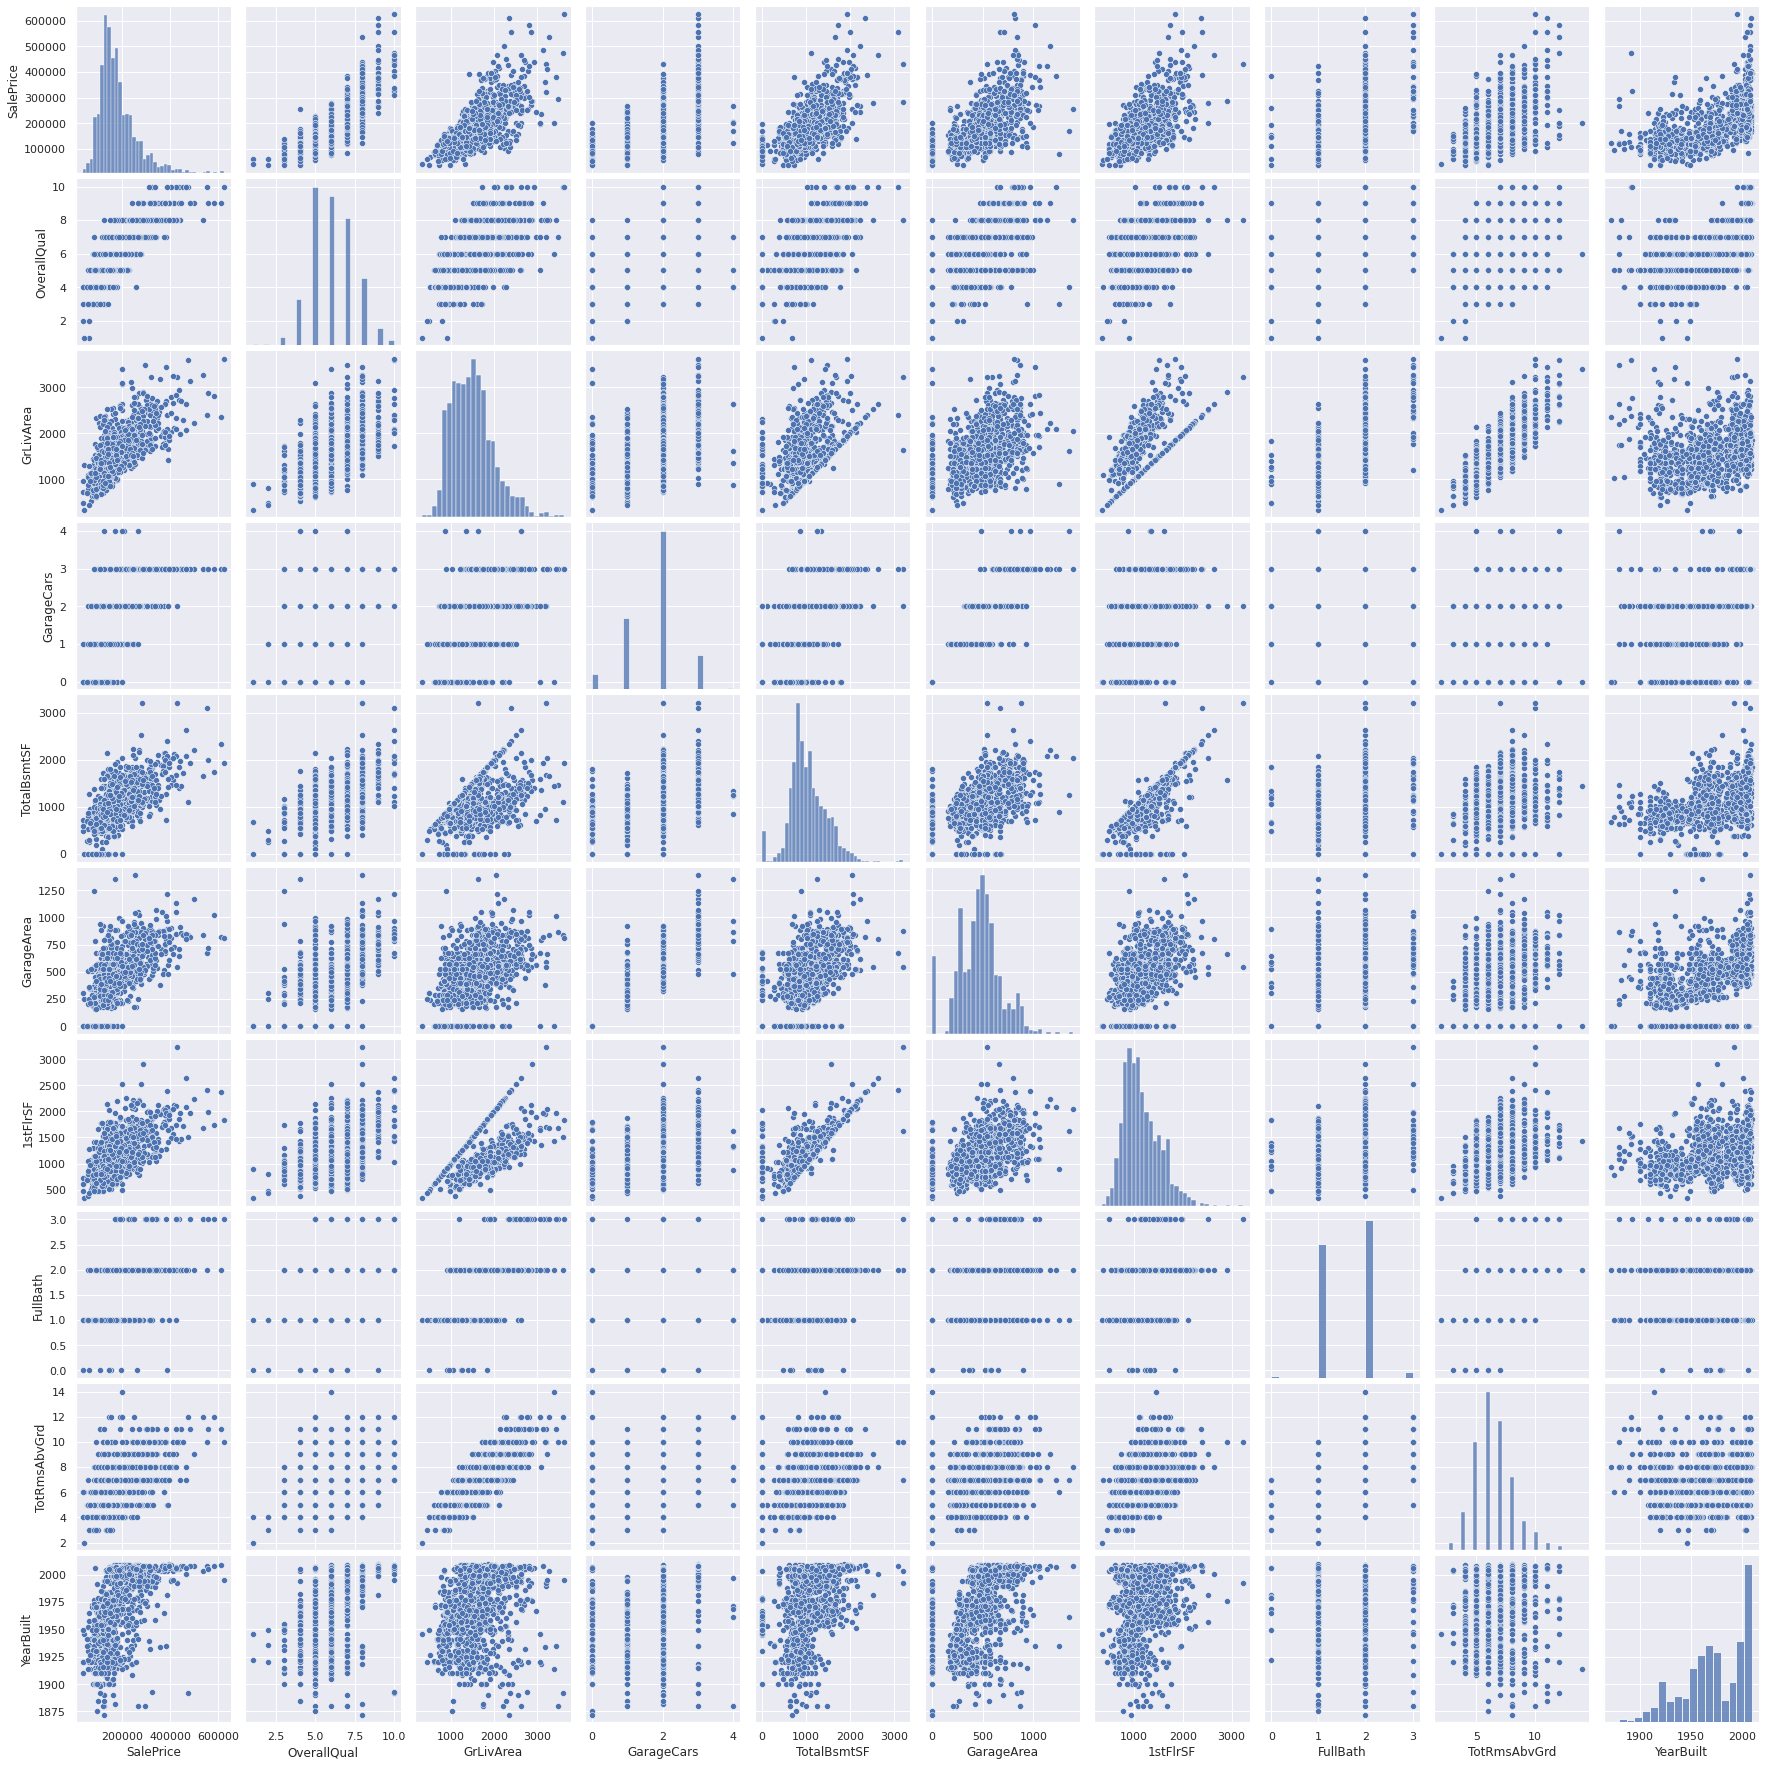

In [198]:
plt.figure(figsize=(15, 15))
sns.pairplot(train[corr['SalePrice'].head(10).index])
#Double cliquer sur le graphique pour zoomer

Les graphiques nous permettent de vérifier que les 10 variables ont une corrélation positive avec le prix de vente.

In [199]:
trainrow = train.shape[0] # Nombre de lignes de la base de données train.
testrow = test.shape[0] # Nombre de lignes de la base de données test.

In [200]:
testids=test['Id'].copy() # On crée un copie de la variable 'Id'.

In [201]:
y_train1=train['SalePrice'].copy() # Target variable

On fusionne les bases de données train et test et on supprime la variable prix de vente et id.

In [202]:
data=pd.concat((train,test)).reset_index(drop=True) # On fusionne les bases de données train et test.
data=data.drop('SalePrice' ,axis = 1) #  La variable SalePrice est supprimée.
data=data.drop('Id',axis=1) # Supprime la variable Id.

## II ) Données manquantes

Dans cette partie, nous allons traiter les données manquantes.

In [203]:
missing=data.isnull().sum().sort_values(ascending=False) # Donne le nombre de donnée manquantes pour chaque variable.
missing=missing.drop(missing[missing==0].index) # On retire de la liste les variables sans données manquantes.
missing # Affiche le nombre de valeurs manquantes pour chaque variable contenant des NA.
missing

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64

Les variables 'PoolQC', 'MiscFeature', 'Alley', 'Fence' et 'FireplaceQu' possèdent beaucoup de données manquantes.

In [204]:
# Pour les variables prenant pour valeurs des chaînes de caractères on remplace nan par NA.

data['PoolQC']=data['PoolQC'].fillna('NA') 

data['MiscFeature']=data['MiscFeature'].fillna('NA')

data['Alley']=data['Alley'].fillna('NA')

data['Fence']=data['Fence'].fillna('NA')

data['FireplaceQu']=data['FireplaceQu'].fillna('NA')

data['GarageCond']=data['GarageCond'].fillna('NA')

data['GarageType']=data['GarageType'].fillna('NA')

data['GarageQual']=data['GarageQual'].fillna('NA')

data['GarageFinish']=data['GarageFinish'].fillna('NA')

data['BsmtExposure']=data['BsmtExposure'].fillna('NA')

data['BsmtCond']=data['BsmtCond'].fillna('NA')

data['BsmtQual']=data['BsmtQual'].fillna('NA')

data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')

data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')

data['MasVnrType']=data['MasVnrType'].fillna('NA')

data['Exterior2nd']=data['Exterior2nd'].fillna('NA')

data['Exterior1st']=data['Exterior1st'].fillna('NA')

In [205]:
# Pour les variables prenant pour valeurs des nombres on remplace nan par 0.

data['GarageYrBlt']=data['GarageYrBlt'].fillna(0)

data['GarageArea']=data['GarageArea'].fillna(0)

data['GarageCars']=data['GarageCars'].fillna(0)

data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)

data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)

data['MasVnrArea']=data['MasVnrArea'].fillna(0)

data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)

data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)

data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)

data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)

In [206]:
data = data.drop('LotFrontage',axis=1) # On supprime la variable 'LotFrantage'

## III ) Feature Engineering

Comme vu plus haut. Certaines variables sont très corrélées avec le prix de vente, dans cette partie, on va créer de nouvelles variables afin d'obtenir un meilleur score de prédiction.

## a )  Création de nouvelle variable

In [207]:
# On augmente la pondération des variables les plus corrélées au prix de vente.

data['GrLivArea_2']=data['GrLivArea']**2
data['GrLivArea_3']=data['GrLivArea']**3
data['GrLivArea_4']=data['GrLivArea']**4

data['TotalBsmtSF_2']=data['TotalBsmtSF']**2
data['TotalBsmtSF_3']=data['TotalBsmtSF']**3
data['TotalBsmtSF_4']=data['TotalBsmtSF']**4

data['GarageCars_2']=data['GarageCars']**2
data['GarageCars_3']=data['GarageCars']**3
data['GarageCars_4']=data['GarageCars']**4

data['1stFlrSF_2']=data['1stFlrSF']**2
data['1stFlrSF_3']=data['1stFlrSF']**3
data['1stFlrSF_4']=data['1stFlrSF']**4

data['GarageArea_2']=data['GarageArea']**2
data['GarageArea_3']=data['GarageArea']**3
data['GarageArea_4']=data['GarageArea']**4

In [208]:
# Création de la variable 'Floorfeet' qui donne le nombre de pieds carrés totale du bien immobilier.

data['Floorfeet']=data['1stFlrSF']+data['2ndFlrSF'] 
data=data.drop(['1stFlrSF','2ndFlrSF'],1) # Suppression des variables '1stFlrSF' et '2ndFlrSF'.

In [209]:
data['Bath']=data['BsmtFullBath'] + data['BsmtHalfBath']*.5 + data['FullBath'] + data['HalfBath']*.5
data = data.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],1)

In [210]:
# On crée une nouvelle variable 'Remodeled' qui prend la valeur  0 s'il n'y a pas de rénovation et 1 s'il y a eu des rénovations. 

data['Remodeled']=0 # Création d'une nouvelle variable.
data.loc[data['YearBuilt']!=data['YearRemodAdd'],'Remodeled'] = 1
data=data.drop('YearRemodAdd',1) # Suppression de la variable 'YeatRemodAdd'

### b ) Encodage des variables catégorielles

La base de données est composée de variables catégorielles contenant plusieurs catégories.

On va décomposer chaque variable catégorielle en sous-variables catégorielles ou chaque valeur suit une loi de Bernoulli à valeurs dans {0,1}.

In [211]:
data=pd.get_dummies(data=data,columns=['MSSubClass'],prefix='MSSubClass')
data=pd.get_dummies(data=data,columns=['MSZoning'],prefix='MSZoning')
data=pd.get_dummies(data=data,columns=['Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'])

In [212]:
data=pd.get_dummies(data=data,columns=['OverallQual'],prefix='OverallQual')

In [213]:
data=pd.get_dummies(data=data,columns=['OverallCond'],prefix='OverallCond')

In [214]:
data=pd.get_dummies(data=data,columns=['Remodeled'])

In [215]:
data=pd.get_dummies(data=data,columns=['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'])

In [216]:
data=pd.get_dummies(data=data,columns=['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'])

## IV ) Feature Scalling

Les échelles de valeurs des données sont totalement différentes selon les caractéristiques (prix de vente, nombre de pieds carrés ...). Toutefois, nous allons devoir traiter les données à l'aide du même algorithme. Pour pallier à ce problème, nous allons effectuer une mise à l’échelle qui consiste donc à mettre aux mêmes niveaux ces données.

In [217]:
from sklearn.preprocessing import StandardScaler

In [218]:
# On sépare la base de données en deux. Une partie pour entraîner le modèle et une autre partie pour tester le modèle.
# On standardise nos données afin d'améliorer la prédiction du prix de vente.

from sklearn.model_selection import train_test_split

X_train=data.iloc[:trainrow]

X_test=data.iloc[trainrow:]

scaler=StandardScaler()

scaler=scaler.fit(X_train)

x_train_scaled=scaler.transform(X_train)

x_test_scaled=scaler.transform(X_test)

## V ) Modèle

Dans cette partie nous allons entraîner nos modèles à l'aide de plusieurs algortihme. 

### a ) Régresssion linéaire

In [219]:
from sklearn.linear_model import LinearRegression
reg_liner=LinearRegression()
reg_liner.fit(x_train_scaled,y_train1)
print("Train score :", reg_liner.score(x_train_scaled,y_train1))

Train score : 0.9527835414824007


### b ) Régression logistique

In [220]:
from sklearn.linear_model import LogisticRegression
reg_logistic=LogisticRegression()
reg_logistic.fit(x_train_scaled,y_train1)

print("Train score :", reg_logistic.score(x_train_scaled,y_train1))

Train score : 0.9993131868131868


/home/ibrahim/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### c ) Gradient boosting

In [221]:
from sklearn.ensemble import GradientBoostingRegressor
Grad_boost=GradientBoostingRegressor()
Grad_boost.fit(x_train_scaled,y_train1)
print("Train score :", Grad_boost.score(x_train_scaled,y_train1))
predicted_prices_Grad_boost = Grad_boost.predict(x_test_scaled)

Train score : 0.9645467507959095


### d ) Arbre de décision

In [222]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(criterion='mse',max_depth=3)
tree.fit(x_train_scaled,y_train1)
print("Train score :", tree.score(x_train_scaled,y_train1))
predicted_prices_tree = tree.predict(x_test_scaled)

Train score : 0.7024370593614333


### e ) Random Forest

In [223]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=500)
rfr.fit(x_train_scaled,y_train1)
print("Train score :", rfr.score(x_train_scaled,y_train1))
predicted_prices_rfr = rfr.predict(x_test_scaled)

Train score : 0.9841563692692773


In [224]:
submission_reg_liner = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices_reg_liner})
submission_reg_liner.to_csv('/home/ibrahim/Téléchargements/submission_reg_liner.csv', index=False)

In [225]:
submission_reg_logistic = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices_reg_logistic})
submission_reg_logistic.to_csv('/home/ibrahim/Téléchargements/submission_reg_logistic.csv', index=False)

In [226]:
submission_Grad_boost = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices_Grad_boost})
submission_Grad_boost.to_csv('/home/ibrahim/Téléchargements/submission_Grad_boost_1.csv', index=False)

In [227]:
submission_tree = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices_tree})
submission_tree.to_csv('/home/ibrahim/Téléchargements/submission_tree.csv', index=False)

In [228]:
submission_rfr = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices_rfr})
submission_rfr.to_csv('/home/ibrahim/Téléchargements/submission_rfr.csv', index=False)

## VI ) Résultats des prédictions sur la plateforme Kaggle

Sur la plateforme Kaggle, les soumissions sont évaluées en fonction de la racine de l'erreur quadratique moyenne (REQM) obtenu entre le logarithme de la valeur prédit et le logarithme du prix de vente observé. Plus la REQM est petite et plus le 

### a ) Classement

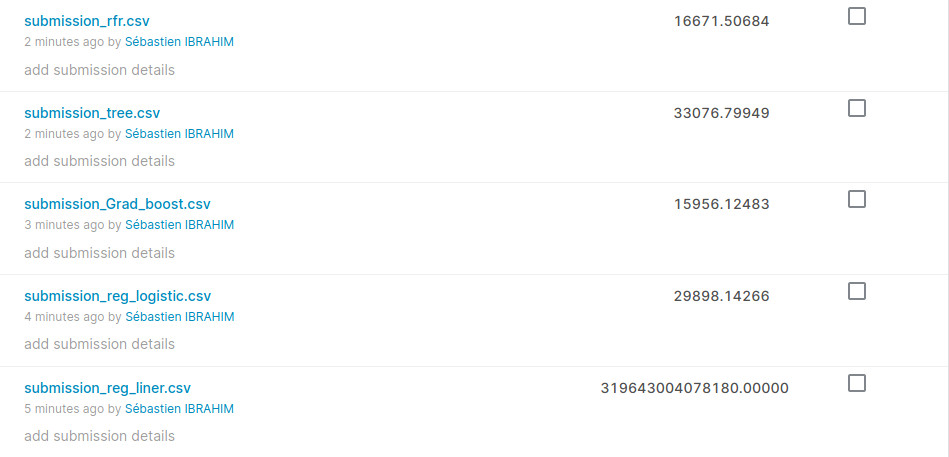

In [229]:
from IPython.display import Image
from IPython.core.display import HTML

Image("/home/ibrahim/Téléchargements/Result_submission.jpg")

L'image ci-dessus nous montre la RSME pour chaque algorithme.


Le classement par ordre croissant est le suivant :


1) GradientBoosting


2) Random Forest


3) Regression logistique


4) Arbre de décision


5) Regression linéaire 


### VII ) Conclusion

L'image ci-dessous montre mon classement dans la compétition.

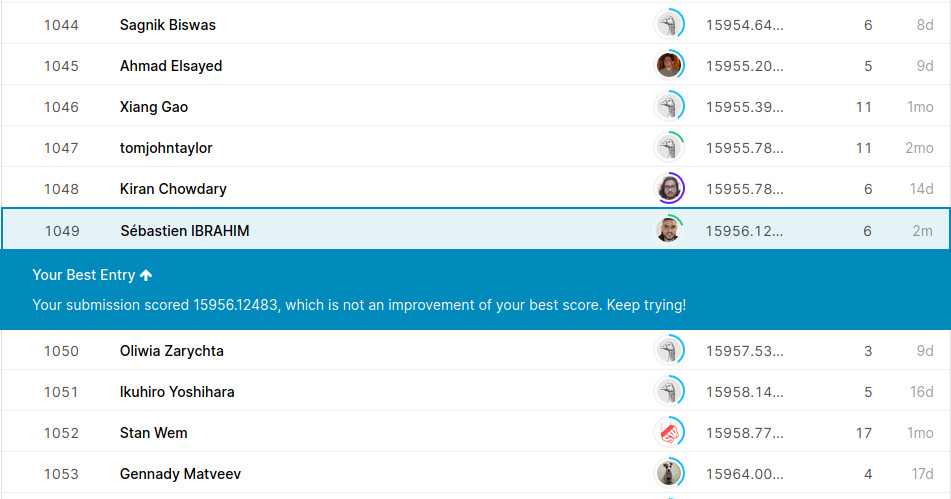

In [230]:
Image("/home/ibrahim/Téléchargements/classement.jpg")

Sur les données train le modèle de régression linéaire nous donne un score de 0.9527835414824007. Toutefois après avoir soumit le modèle sur kaggle, on constate que la RMSE est très grande et donc, que le modèle fournit une mauvaise prédiction des prix de vente.


Le modèle de régression linéaire dans ce contexte fait de l'overfitting, c'est-à-dire que le modèle, c'est trop adapté aux données du Training set et prédit mal les données nouvelles.


Au contraire, le modèle d'arbre de décision pour cette base de données semble faire de l'Underfitting, c'est-à-dire que le modèle ne s'adapte pas assez aux données du training set.


Enfin, pour cette base de données et dans ce contexte, l'algorithme GradientBoosting fournit les meilleurs résultats en termes de RMSE et donne la meilleure prédiction du prix de vente d'un bien immobiliers.